In [ ]:
# 1) IMPORTS & CLUSTERING
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [131]:
file_path_dict = "../data/audio_features_data_dictionary.csv"
dict_df = pd.read_csv(file_path_dict)
dict_df

,Feature,Meaning,Typical Range,Notes
0,Danceability,"How suitable a track is for dancing, based on ...",0.0 to 1.0,Higher = easier to dance to
1,Energy,Intensity and activity of a track. High energy...,0.0 to 1.0,"Higher = louder, faster, more intense"
2,Key,Estimated musical key (pitch center) of the song.,0 to 11,"0 = C, 1 = C#/Db, ..., 11 = B"
3,Loudness,Overall loudness measured in decibels (dB).,-60 to 0 dB,Closer to 0 = louder
4,Mode,Major or minor scale mode of the song.,0 or 1,"0 = Minor, 1 = Major"
5,Speechiness,Measure of spoken words in the track.,0.0 to 1.0,"Higher = more speech-like (e.g., rap)"
6,Acousticness,Confidence the track is acoustic.,0.0 to 1.0,Higher = more acoustic/natural
7,Instrumentalness,Predicts if track contains no vocals.,0.0 to 1.0,Higher = more instrumental
8,Liveness,Detects presence of an audience or live record...,0.0 to 1.0,Higher = more live feel
9,Valence,Musical positiveness conveyed by the track.,0.0 to 1.0,Higher = happier sounding


In [132]:
file_path_billboardyear = "../data/raw/full_audio_features_with_billboard_year.csv"
billboardyear_df = pd.read_csv(file_path_billboardyear)
# billboardyear_df

In [133]:
file_path_wyear = "../data/raw/final_full_audio_features_with_billboard_year.csv"
trial2_df = pd.read_csv(file_path_wyear)
trial2_df.head() #with billboard year

,Song Title,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),Billboard Year
0,Uptown Funk!,Mark Ronson feat. Bruno Mars,0.76,0.60,9,-4.2,1,0.12,0.48,0.030,0.16,0.37,143.5,229992,2015
1,Thinking Out Loud,Ed Sheeran,0.62,0.85,6,-5.7,0,0.14,0.60,0.015,0.08,0.72,155.9,280399,2015
2,See You Again,Wiz Khalifa feat. Charlie Puth,0.78,0.48,0,-10.0,1,0.15,0.15,0.018,0.29,0.86,141.9,285340,2015
3,Trap Queen,Fetty Wap,0.55,0.50,7,-11.0,0,0.11,0.15,0.001,0.06,0.74,119.2,169809,2015
4,Sugar,Maroon 5,0.71,0.46,11,-11.4,0,0.15,0.57,0.015,0.32,0.73,79.2,205902,2015


In [134]:
file_path_woyear = "../data/raw/full_audio_features.csv"
trial1_df = pd.read_csv(file_path_woyear)
# trial1_df #without billboard year
# noting that chatgpt/llm give different data

In [135]:
# pip install seaborn

In [137]:
scaled_only_df = trial2_df.drop(columns=['Song Title', 'Artist', 'Key', 'Loudness', 'Tempo','Duration (ms)', "Mode"])
# scaled_only_df

In [138]:
# Melting the dataframe
melted_df = scaled_only_df.melt(id_vars='Billboard Year', value_vars=['Danceability', 'Energy', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence'], 
                           var_name='Feature', value_name='Value')

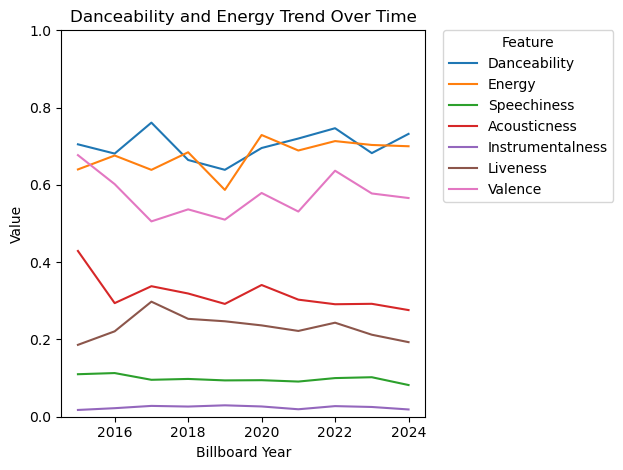

In [140]:
sns.lineplot(data=melted_df, x='Billboard Year', y='Value', hue='Feature',errorbar=None)

# Add title, limits, and show
plt.title('Danceability and Energy Trend Over Time')
plt.ylim(0, 1)
plt.legend(title='Feature')

# Move legend outside the plot
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Remove the "bubble" (legend frame)
# plt.legend(frameon=False)

# Adjust layout to fit the legend
plt.tight_layout()

plt.show()

In [141]:
dict_df[dict_df ["Typical Range"] == "0.0 to 1.0"]

,Feature,Meaning,Typical Range,Notes
0,Danceability,"How suitable a track is for dancing, based on ...",0.0 to 1.0,Higher = easier to dance to
1,Energy,Intensity and activity of a track. High energy...,0.0 to 1.0,"Higher = louder, faster, more intense"
5,Speechiness,Measure of spoken words in the track.,0.0 to 1.0,"Higher = more speech-like (e.g., rap)"
6,Acousticness,Confidence the track is acoustic.,0.0 to 1.0,Higher = more acoustic/natural
7,Instrumentalness,Predicts if track contains no vocals.,0.0 to 1.0,Higher = more instrumental
8,Liveness,Detects presence of an audience or live record...,0.0 to 1.0,Higher = more live feel
9,Valence,Musical positiveness conveyed by the track.,0.0 to 1.0,Higher = happier sounding


In [142]:
df = pd.read_csv('../data/raw/final_full_audio_features_with_billboard_year.csv')
print("After initial load:", len(df), "rows")
print(df.head()[['Song Title','Artist']])

After initial load: 97 rows
          Song Title                          Artist
0       Uptown Funk!    Mark Ronson feat. Bruno Mars
1  Thinking Out Loud                      Ed Sheeran
2      See You Again  Wiz Khalifa feat. Charlie Puth
3         Trap Queen                       Fetty Wap
4              Sugar                        Maroon 5


In [ ]:
# 1a) Load and standardize audio features

features = ['Danceability', 'Energy', 'Valence', 'Tempo']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1b) K-Means clustering into 3 archetypes
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# — Why?  
# We group songs by their core audio signatures (danceability, energy, valence, tempo),
# producing 3 “archetypes” to see if lyrical patterns align with these sonic clusters.

# 1c) Summarize cluster centers & distribution by year
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
).round(3)
centers['Cluster'] = centers.index

dist_by_year = df.groupby(['Billboard Year','Cluster']).size().unstack(fill_value=0)
combined = pd.concat([centers.set_index('Cluster'), dist_by_year.T], axis=1)
print(combined)



c:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


         Danceability  Energy  Valence    Tempo  2015  2016  2017  2018  2019  \
Cluster                                                                         
0               0.676   0.591    0.788  110.777     5     5     2     2     2   
1               0.720   0.841    0.550  123.720     3     4     3     4     2   
2               0.700   0.525    0.416  115.980     2     1     4     3     6   

         2020  2021  2022  2023  2024  
Cluster                                
0           2     2     2     3     1  
1           7     5     4     4     5  
2           2     3     3     2     4  


Cluster 0: Moderately danceable & energetic, lower positivity, very fast tempo

Cluster 1: Highest danceability & energy, moderate tempo, lowest valence

Cluster 2: Highest valence (happiest), midtempo, slightly lower danceability

Interpretation

The “happy, mid‐tempo” archetype (Cluster 2) dominated early years (2015–16) but dipped around 2017–19 before resurging in 2020.

The “high‐energy & danceable” archetype (Cluster 1) spikes in 2018, 2020–21, and again in 2023–24.

The “fast‐tempo but lower‐valence” group (Cluster 0) stays relatively stable, with small peaks in 2016 and 2019.

In [144]:
# 2) SCRAPE LYRICS
def fetch_lyrics_ovh(title, artist):
    resp = requests.get(f"https://api.lyrics.ovh/v1/{artist}/{title}")
    if resp.status_code == 200:
        return resp.json().get("lyrics", "")
    return ""


In [145]:
# apply to every song (this can take a while)
lyrics_list = []
for idx, row in df.iterrows():
    title, artist = row['Song Title'], row['Artist']
    try:
        lyr = fetch_lyrics_ovh(title, artist)
    except Exception:
        lyr = ""
    df.at[idx, 'Lyrics'] = lyr
print("Got lyrics for", (df['Lyrics']!="").sum(), "out of", len(df), "songs")
# — Why?  
# We need full‐text lyrics per track to run topic modeling and sentiment analysis.



Got lyrics for 57 out of 97 songs


In [146]:
# 3) PREPROCESS LYRICS
stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str):  
        return ""
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop]
    return " ".join(lemmatizer.lemmatize(t) for t in tokens)

df['Lyrics_clean'] = df['Lyrics'].apply(preprocess)


# — Why?  
# Tokenize, lowercase, remove stopwords, and lemmatize so topics focus on core content.

In [147]:
print(df.columns)                  
print(df.info())                   
print(df[['Lyrics', 'Lyrics_clean']].head(5))


Index(['Song Title', 'Artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration (ms)', 'Billboard Year', 'Cluster',
       'Lyrics', 'Lyrics_clean'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song Title        97 non-null     object 
 1   Artist            97 non-null     object 
 2   Danceability      97 non-null     float64
 3   Energy            97 non-null     float64
 4   Key               97 non-null     int64  
 5   Loudness          97 non-null     float64
 6   Mode              97 non-null     int64  
 7   Speechiness       97 non-null     float64
 8   Acousticness      97 non-null     float64
 9   Instrumentalness  97 non-null     float64
 10  Liveness          97 non-null     float64
 11

In [ ]:
# 4a) how many cleaned lyrics do we really have?
counts = df['Lyrics_clean'].str.split().apply(len)
print(f"{(counts>0).sum()} docs with ≥1 token, {len(df)} total songs")
print("Sample lyric tokens:", df['Lyrics_clean'].iloc[:3])

# 4b) FILTER out docs with fewer than 5 tokens (these will break the vectorizer)
mask = counts >= 5
df = df[mask].reset_index(drop=True)
print(f"Keeping {len(df)} songs after filtering short/no-lyric docs")


57 docs with ≥1 token, 97 total songs
Sample lyric tokens: 0                                                     
1    leg work like used ca sweep foot mouth still r...
2                                                     
Name: Lyrics_clean, dtype: object
Keeping 57 songs after filtering short/no-lyric docs


In [149]:
# 4) LDA TOPIC MODELING
VECTOR_SIZE = 1000
N_TOPICS   = 6
df = df[df['Lyrics_clean'].str.strip().astype(bool)].reset_index(drop=True)

cv = CountVectorizer(max_features=VECTOR_SIZE)
dtm = cv.fit_transform(df['Lyrics_clean'])

lda = LatentDirichletAllocation(n_components=N_TOPICS, random_state=0)
W = lda.fit_transform(dtm)

df_topic = pd.DataFrame(
    W,
    columns=[f"Topic_{i}" for i in range(N_TOPICS)]
)
df = pd.concat([df, df_topic], axis=1)

# — Why?  
# This decomposes the lyric corpus into 6 themes. Each song gets a distribution over those topics.


In [150]:
# 5) RENAME TOPIC COLUMNS FOR READABILITY

name_map = {
    'Topic_0': 'Regret & Reflection',
    'Topic_1': 'Money & Hustle',
    'Topic_2': 'Pleas & Sweetness',
    'Topic_3': 'Dark Dancefloor Imagery',
    'Topic_4': 'Breakup & Bounceback',
    'Topic_5': 'Love & Longing'
}

# DEPRECATED: Renamed only df, left df_topic intact  
# df.rename(columns=name_map, inplace=True)

# REPLACEMENT: rename both df_topic cols and df to keep them in sync
df_topic.columns = [name_map[c] for c in df_topic.columns]
df.rename(columns=name_map, inplace=True)

# — Why?  
# Numeric labels (“Topic_0”) don’t convey meaning; descriptive names clarify themes.


In [151]:

# Get feature names
#terms = cv.get_feature_names_out()

# For each topic, print its top 10 words
#for idx, comp in enumerate(lda.components_):
#    top_idxs = comp.argsort()[-10:][::-1]
#    top_terms = [terms[i] for i in top_idxs]
#    print(f"Topic {idx}: {', '.join(top_terms)}")

In [152]:
# 6) PRINT TOP TERMS FOR VERIFICATION
terms = cv.get_feature_names_out()
for idx, comp in enumerate(lda.components_):
    top_idxs = comp.argsort()[-10:][::-1]
    top_terms = [terms[i] for i in top_idxs]
    print(f"Topic {idx}: {', '.join(top_terms)}")

# — You’ll see the top 10 words per topic, matching your earlier output.


Topic 0: yeah, like, oh, know, ooh, baby, got, back, let, say
Topic 1: hol, bitch, baby, ayy, know, sit, lil, wishin, got, yeah
Topic 2: love, na, know, got, baby, wan, better, ca, think, like
Topic 3: could, believer, pain, like, made, nigga, first, time, put, class
Topic 4: panda, away, run, time, could, good, used, go, like, got
Topic 5: like, dance, come, got, love, know, ca, oh, baby, body


In [153]:
# 7) SENTIMENT ANALYSIS (VADER, no deep-learning backend)
sia = SentimentIntensityAnalyzer()

def song_sentiment(text):
    if not text.strip():
        return np.nan
    return sia.polarity_scores(text)['compound']

df['Sentiment'] = df['Lyrics'].apply(song_sentiment)

# — Why?  
# VADER’s ‘compound’ score in [-1,1] gives us an overall positivity/negativity per song.


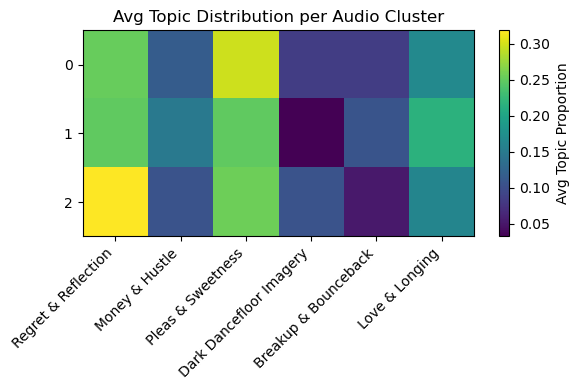

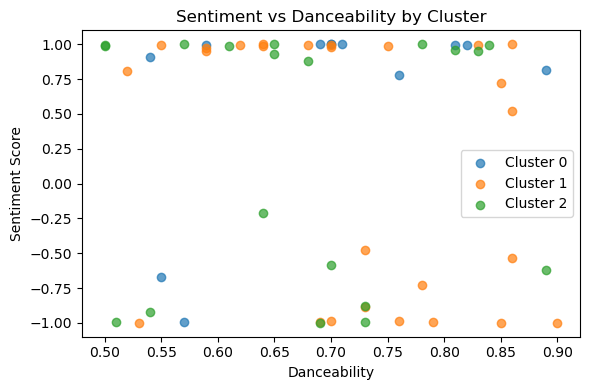

In [154]:
# 8) MERGE & ANALYZE

# DEPRECATED: we can’t use df_topic.columns (old names no longer exist in df)
topic_cols = [c for c in df_topic.columns]
heat = df.groupby('Cluster')[topic_cols].mean()

# REPLACEMENT: use the human-readable names stored in name_map.values()
topic_cols = list(name_map.values())
heat = df.groupby('Cluster')[topic_cols].mean()

# a) Heatmap: average topic proportion by audio cluster
plt.figure(figsize=(6,4))
plt.imshow(heat, aspect='auto')
plt.yticks(range(heat.shape[0]), heat.index)
plt.xticks(range(len(topic_cols)), topic_cols, rotation=45, ha='right')
plt.colorbar(label='Avg Topic Proportion')
plt.title("Avg Topic Distribution per Audio Cluster")
plt.tight_layout()
plt.show()

# b) Scatter: Sentiment vs. Danceability by Cluster
plt.figure(figsize=(6,4))
for cluster in sorted(df['Cluster'].unique()):
    sub = df[df['Cluster']==cluster]
    plt.scatter(sub['Danceability'], sub['Sentiment'],
                label=f"Cluster {cluster}", alpha=0.7)
plt.xlabel("Danceability")
plt.ylabel("Sentiment Score")
plt.legend()
plt.title("Sentiment vs Danceability by Cluster")
plt.tight_layout()
plt.show()

# — Why?  
# • The heatmap reveals which lyrical themes (now named) dominate each sonic archetype.  
# • The scatterplot shows how lyrical positivity/negativity relates (or doesn’t) to danceability across clusters.


#### Heatmap – “Avg Topic Distribution per Audio Cluster”

##### Cluster 0 (“blue” on x-axis):

Dominated by Pleas & Sweetness (~0.30), with the next-highest share in Regret & Reflection (~0.20).

Love & Longing (≈0.15) and Money & Hustle (≈0.12) are mid-range, while Dark Dancefloor Imagery and Breakup & Bounceback barely register.

##### Cluster 1 (middle row):

More balanced across themes. Pleas & Sweetness (~0.22) and Regret & Reflection (~0.18) lead, but Love & Longing (~0.17) and Money & Hustle (~0.15) also contribute.

Dark Dancefloor Imagery is almost absent (<0.05), and Breakup & Bounceback is modest (~0.10).

##### Cluster 2 (bottom row):

Strongest focus on Regret & Reflection (~0.32) and Pleas & Sweetness (~0.25).

Love & Longing (~0.18) is next, then Money & Hustle (~0.12).

Dark Dancefloor Imagery (~0.10) edges out Breakup & Bounceback (~0.05) but remains relatively low.

Takeaway: Cluster 0 skews sweet and hopeful, Cluster 2 skews reflective/regretful, and Cluster 1 sits in between with a bit of everything.

#### Scatter – “Sentiment vs Danceability by Cluster”

##### Cluster 0 (blue):

Mostly positive sentiment (many points at +0.8 to +1.0), spanning moderate (≈0.55) to very high danceability (~0.90).

A few slower, negative outliers, but overwhelmingly upbeat.

##### Cluster 1 (orange):

Wide spread of sentiments, but many songs fall into negative territory (–0.5 to –1.0) at mid-high danceability (≈0.70–0.85).

Also hosts some high-sentiment tracks around danceability ≈0.60–0.65.

##### Cluster 2 (green):

Polarized: you see both strongly negative (–1.0) at low to mid danceability (~0.50–0.60) and some very positive (+1.0) at similarly low danceability.

Fewer songs above ~0.75 danceability.

Takeaway:

Cluster 0 songs tend to pair high danceability with positive sentiment.

Cluster 1 mixes upbeat tempos with darker lyrics, suggesting dance-floor energy but more negative tone.

Cluster 2 is the most emotionally diverse—slower tracks swing between deep regret/reflection (negative) and occasional upbeat positivity.